In [93]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
import json

In [94]:
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
import json

In [95]:
with open('testEinfach1.json') as einfachJson:
    json_einfach_for_einfachData = json.load(einfachJson)

#das sind alle Events mit Element id von einfach
reduzed_json_einfach_for_einfachData = []

#das sind alle Events mit Element id von einfach
for index, item in enumerate(json_einfach_for_einfachData):
    elementId = item.get('elementId')
    if (elementId == 'inputCountry' or elementId == 'inputHouse' or elementId ==  'inputPet' or elementId ==  'inputHand' or elementId ==  'inputBundesland' or elementId == 'inputEasyQuestion' or (elementId == 'window' and item.get('siteName') == 'TestEinfach')):
        reduzed_json_einfach_for_einfachData.append(item)

In [96]:
with open('testEinfach1.json') as einfachJson:
    json_einfach_for_missing_keys = json.load(einfachJson)

#array mit allen Events die property key haben in TestEinfach
array_with_keys_from_einfach = []

#get all events with key 
for index, item in enumerate(json_einfach_for_missing_keys):
    if(item.get('key')):
        array_with_keys_from_einfach.append(item)

#array mit allen Events die jetzt richtig zugeteilt wurden zu TestSchwer
items_with_correct_keys = []

#get all events which are actually in TestSchwer
for index, item in enumerate(array_with_keys_from_einfach):
    elementId = item.get('elementId')
    if(elementId == 'inputHobby' or elementId =='inputCancelor' or elementId =='inputTemperature' or elementId =='inputDays' or elementId =='inputRivers' or elementId =='inputDifficultQuestion'):
        item['siteName'] = 'TestSchwer'
        items_with_correct_keys.append(item)

In [97]:
with open('testSchwer1.json') as schwerJson: 
    json_schwer = json.load(schwerJson)

#richtige schwer Events + array mit allen Events die jetzt richtig zugeteilt wurden zu TestSchwer
extended_json_schwer = json_schwer + items_with_correct_keys

In [98]:
from sklearn.utils import shuffle

df_schwer = pd.DataFrame(extended_json_schwer)
df_einfach = pd.DataFrame(reduzed_json_einfach_for_einfachData)

In [99]:
# ohne 'key' Spalte
df_schwer_without_key = df_schwer.drop(['key'], axis=1)
#6470 Events ohne scroll
df_schwer_without_scroll = df_schwer_without_key.loc[df_schwer_without_key["type"] !="scroll"]

df_einfach_without_key = df_einfach.drop(['key'], axis=1)
#1679 Events ohne scroll
df_einfach_without_scroll = df_einfach_without_key.loc[df_einfach_without_key["type"] !="scroll"]

In [100]:
df = pd.concat([df_einfach_without_scroll, df_schwer_without_scroll])
result = shuffle(df)
result_einfach = shuffle(df_einfach_without_scroll)
result_schwer = shuffle(df_schwer_without_scroll)
result_einfach['timeStamp'] = result_einfach['timeStamp'].astype(float)
result_schwer['timeStamp'] = result_schwer['timeStamp'].astype(float)

In [101]:
result['type_id'] = np.where(df['type']=="click", 510.0,
                   np.where(df['type']=="focus", 511.0,
                   np.where(df['type']=="blur", 512.0,
                   np.where(df['type']=="keydown", 513.0,
                   np.where(df['type']=="mouseover", 514.0,
                   np.where(df['type']=="mouseout", 515.0, 'value4'))))))

result['type_id'] = result['type_id'].astype(float)
result['timeStamp'] = result['timeStamp'].astype(float)

<ipython-input-101-736e162c378e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['type_id'] = np.where(df['type']=="click", 510.0,
<ipython-input-101-736e162c378e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['type_id'] = result['type_id'].astype(float)
<ipython-input-101-736e162c378e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [102]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(result, col, max_cat=20):
    if (result[col].dtype == "TestEinfach") | (result[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

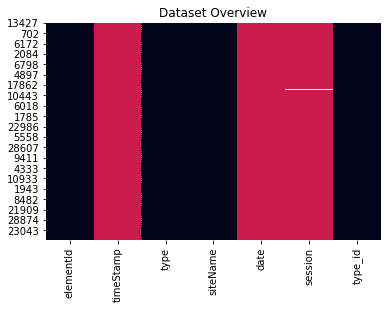

 Categerocial   Numeric   NaN 


In [103]:
dic_cols = {col:utils_recognize_type(result, col, max_cat=20) for col in result.columns}
heatmap = result.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [104]:
result = result.set_index("session")
result = result.rename(columns={"siteName":"Y"})

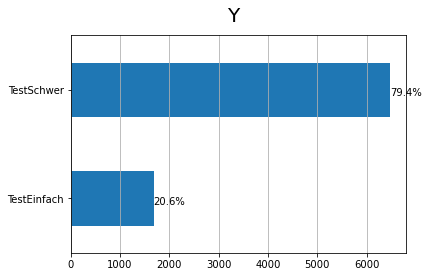

In [105]:
y = "Y"
ax = result[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


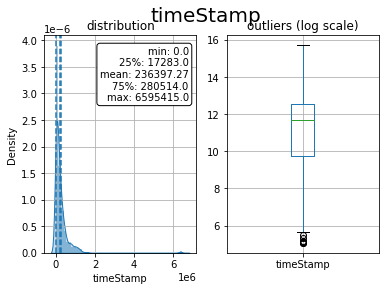

In [106]:
x = "timeStamp"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = result[x].fillna(result[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = result[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(result[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()
#Plot and compare densities of the two samples, if the distributions are different then the variable is predictive because the two groups have different patterns.

In [107]:
#category vs numberical
#Annahme die Zeit beeinflusst das Ergebnis 
cat, num = "Y", "timeStamp"
model = smf.ols(num+' ~ '+cat, data=result).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


In [120]:
#category vs category -> Die typeId beeinflussen das Zeitergebnis
x, y = "elementId", "Y"
cont_table = pd.crosstab(index=result[x], columns=result[y])
chi2_test = scipy.stats.chi2_contingency(cont_table)
chi2, p = chi2_test[0], chi2_test[1]
n = cont_table.sum().sum()
phi2 = chi2/n
r,k = cont_table.shape
phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
rcorr = r-((r-1)**2)/(n-1)
kcorr = k-((k-1)**2)/(n-1)
coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Cramer Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")

Cramer Correlation: 0.983 Significant (p-value:0.0)
